## VAE using pytorch

### Data exploration

In [1]:
import pandas as pd
import numpy as np
import os


In [2]:
os.chdir(r"D:\Yichen_Guo\YichenG_Code\Yichen-Capstone-Project")
os.getcwd()

'D:\\Yichen_Guo\\YichenG_Code\\Yichen-Capstone-Project'

In [3]:
mRNA = pd.read_csv("Data/HCC-GU/mRNA_Enzy.csv",delimiter=";")
miRNA = pd.read_csv("Data/HCC-GU/miRNA_Enzy.csv",delimiter=";")
score_mat =  pd.read_csv("Data/HCC-GU/Score_mat_Enzy.csv",delimiter=";")
patient_labels = pd.read_csv("Data/HCC-GU/sample_labels.csv",delimiter=";") # 1 indicated patient with HCC and CIRR (39), 0 indicated patients with CIRR (25) 

In [4]:
mRNA.head()

## each row is a liver tissue that extract from the 64 patients (marked in the patient_label)

,A2M,A4GALT,A4GNT,AAAS,AACS,AADAC,AADAT,AANAT,AARS,AASDHPPT,...,ZNF254,ZNF43,ZNF610,ZNF675,ZNF682,ZNF708,ZNF85,ZNF91,ZNF93,ZWILCH
T_001,-0.943365,1.071710,1.071710,0.393936,1.005661,-1.393830,-0.621972,-0.621972,-1.620037,-1.498261,...,1.005661,1.498261,1.393830,0.101446,0.827756,1.393830,0.527832,0.020259,1.218445,-0.670934
T_007,-0.773586,0.670934,0.393936,-1.218445,0.827756,-0.574326,-0.308231,0.183245,1.005661,-1.964241,...,-0.393936,0.721399,0.224533,0.142238,1.393830,0.060807,1.142291,2.269380,0.773586,0.224533
T_013,0.020259,-0.060807,-0.974085,-0.773586,-1.964241,0.943365,0.574326,-0.621972,-0.670934,-1.393830,...,0.308231,-0.101446,0.183245,-1.071710,-0.527832,0.101446,0.884222,0.142238,-0.308231,-0.621972
T_016,-0.621972,-0.350792,-0.183245,0.020259,-0.266171,0.101446,0.670934,1.142291,-1.393830,-0.308231,...,1.142291,-1.071710,-1.301604,0.183245,1.620037,0.266171,-0.574326,1.005661,0.224533,1.620037
T_020,-0.670934,-0.393936,0.266171,0.183245,-0.437756,1.071710,-0.437756,-0.621972,-0.142238,-0.884222,...,1.768555,0.527832,0.482351,0.224533,-0.020259,0.574326,0.393936,1.218445,-0.266171,0.060807


In [5]:
miRNA

## each row is a liver tissue that extract from the 64 patients (marked in the patient_label)

,hsa.let.7a.2.3p,hsa.let.7a.3p,hsa.let.7a.5p,hsa.let.7b.3p,hsa.let.7b.5p,hsa.let.7c.3p,hsa.let.7c.5p,hsa.let.7d.3p,hsa.let.7d.5p,hsa.let.7e.3p,...,hsa.miR.95.3p,hsa.miR.95.5p,hsa.miR.9500,hsa.miR.96.5p,hsa.miR.98.3p,hsa.miR.98.5p,hsa.miR.99a.3p,hsa.miR.99a.5p,hsa.miR.99b.3p,hsa.miR.99b.5p
T_001,1.973054,0.395704,-0.352366,1.400084,0.352366,0.352366,-0.439720,1.223912,0.101901,1.400084,...,-0.576903,-1.223912,-0.020350,0.724636,1.627306,-0.576903,-0.395704,-1.504984,1.147417,0.947598
T_007,-1.973054,0.352366,1.307444,0.020350,0.777057,0.309614,0.439720,0.309614,1.776490,0.831470,...,1.223912,0.309614,-1.042831,1.307444,0.724636,1.776490,0.061080,-0.888189,0.576903,0.439720
T_013,1.010173,0.184067,0.309614,0.439720,0.184067,-0.673945,-0.020350,-0.947598,-0.101901,-0.267365,...,0.061080,-0.061080,1.400084,-0.530201,0.831470,0.624763,-0.439720,-0.439720,-0.225540,-0.530201
T_016,2.279563,-2.279563,-0.225540,-0.309614,-0.395704,-0.576903,0.020350,1.147417,-0.061080,-2.279563,...,-0.624763,-0.439720,-1.042831,-0.831470,-1.223912,-0.831470,-0.888189,-1.147417,-1.504984,-1.504984
T_020,0.673945,-0.184067,-0.267365,-0.888189,-0.576903,-0.225540,-0.184067,-0.624763,-0.624763,-0.309614,...,-0.724636,0.888189,-1.042831,-0.352366,1.307444,0.831470,-0.724636,0.395704,-0.142876,0.225540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T_086,0.530201,1.223912,1.627306,0.352366,1.504984,1.307444,1.504984,-0.530201,0.777057,1.223912,...,1.400084,0.267365,0.777057,-0.061080,-0.020350,0.267365,1.627306,1.776490,1.307444,1.223912
T_089,-1.307444,-0.484515,0.888189,-0.101901,1.400084,-0.020350,0.888189,0.888189,0.309614,-0.061080,...,0.888189,0.673945,-1.042831,0.184067,-0.777057,-0.184067,0.673945,0.777057,0.888189,0.777057
T_092,-1.076518,-0.309614,1.400084,1.147417,1.776490,0.724636,0.267365,0.777057,1.627306,1.973054,...,1.010173,-1.776490,-0.184067,0.309614,-0.530201,-0.624763,0.484515,1.400084,1.973054,1.973054
T_095,-0.777057,0.724636,1.973054,0.484515,1.973054,1.973054,1.627306,1.010173,1.010173,0.439720,...,1.776490,0.624763,-1.042831,0.061080,-0.673945,-0.225540,1.223912,0.831470,1.627306,1.627306


In [6]:
score_mat

## Domain knowledge
## four confiendence level for mRNA-miRNA associations, 1 for experimentally observed links, 0.75 for highly predicted, 0.5 for moderately predicted, and 0 for those neither observed nor predicted

,hsa.let.7a.2.3p,hsa.let.7a.3p,hsa.let.7a.5p,hsa.let.7b.3p,hsa.let.7b.5p,hsa.let.7c.3p,hsa.let.7c.5p,hsa.let.7d.3p,hsa.let.7d.5p,hsa.let.7e.3p,...,hsa.miR.95.3p,hsa.miR.95.5p,hsa.miR.9500,hsa.miR.96.5p,hsa.miR.98.3p,hsa.miR.98.5p,hsa.miR.99a.3p,hsa.miR.99a.5p,hsa.miR.99b.3p,hsa.miR.99b.5p
A2M,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0
A4GALT,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0
A4GNT,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.75,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0
AAAS,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0
AACS,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF708,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0
ZNF85,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0
ZNF91,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0
ZNF93,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.0,0,0,0,0.0,0,0,0


## building the autoencoder

Based on the performace, the potiential of including supervised classification in to the model?
- To get a better represetntation of the original data?
- known to work for classification problems

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import random_split
from torch.utils.data import SubsetRandomSampler
import torch.nn.functional as F
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

c:\Users\Yichen\.conda\envs\dsan6600\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, z_dim, drop_out=0.5):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.bn1 = nn.BatchNorm1d(hidden_dim1)  # Batch Normalization layer
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)  # Batch Normalization layer
        self.dropout = nn.Dropout(drop_out) 
        self.fc_mu = nn.Linear(hidden_dim2, z_dim)
        self.fc_log_var = nn.Linear(hidden_dim2, z_dim)
    
    def forward(self, x):
        h = torch.relu(self.bn1(self.fc1(x)))  # Apply Batch Normalization
        h = self.dropout(h)
        h = torch.relu(self.bn2(self.fc2(h)))  # Apply Batch Normalization
        h = self.dropout(h)
        mu = self.fc_mu(h)
        log_var = self.fc_log_var(h)
        return mu, log_var

class Decoder(nn.Module):
    def __init__(self, z_dim, hidden_dim1, hidden_dim2, output_dim, drop_out=0.5):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(z_dim, hidden_dim1)
        self.bn1 = nn.BatchNorm1d(hidden_dim1)  # Batch Normalization layer
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)  # Batch Normalization layer
        self.dropout = nn.Dropout(drop_out) 
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
    
    def forward(self, x):
        h = torch.relu(self.bn1(self.fc1(x)))  # Apply Batch Normalization
        h = self.dropout(h)
        h = torch.relu(self.bn2(self.fc2(h)))  # Apply Batch Normalization
        h = self.dropout(h)
        recon = self.fc3(h) # using linear due to data type, may use sigmoid if want to use this as classification method
        return recon

class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, z_dim, drop_out):
        super(VAE, self).__init__()
        self.encoder = Encoder(input_dim, hidden_dim1, hidden_dim2, z_dim, drop_out)
        self.decoder = Decoder(z_dim, hidden_dim1, hidden_dim2, input_dim, drop_out)
    
    def forward(self, x):
        mu, log_var = self.encoder(x)
        std = torch.exp(log_var / 2)
        eps = torch.randn_like(std)
        z = mu + eps * std
        recon = self.decoder(z)
        return recon, mu, log_var

def loss_function(recon_x, x, mu, log_var):
    MSE = nn.functional.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return MSE + KLD

## train the VAE and extract latent space

In [57]:
def prepare_data(df_train, patient_labels, batch_size, train_split=0.8):
    tensor_labels = torch.tensor(patient_labels.values, dtype=torch.float32)
    tensor_train = torch.tensor(df_train.values, dtype=torch.float32)
    dataset = TensorDataset(tensor_train, tensor_labels)

    train_size = int(train_split * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # For extracting latent vectors from the entire dataset
    full_dataset_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, full_dataset_loader

def train_vae_model(model, train_loader, val_loader, num_epochs, patience, device, model_save_name):
    best_val_loss = float('inf')
    train_loss_values = []
    val_loss_values = []
    wait = 0

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for data, _ in train_loader:
            data = data.to(device)
            optimizer.zero_grad()
            recon_batch, mu, log_var = model(data)
            loss = loss_function(recon_batch, data, mu, log_var)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader.dataset)
        train_loss_values.append(train_loss)

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, _ in val_loader:
                data = data.to(device)
                recon_batch, mu, log_var = model(data)
                val_loss += loss_function(recon_batch, data, mu, log_var).item()

        val_loss /= len(val_loader.dataset)
        val_loss_values.append(val_loss)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), model_save_name)
            wait = 0
        else:
            wait += 1
            if wait >= patience:
                print('Early stopping')
                break

    return train_loss_values, val_loss_values

def extract_latent_vectors_and_labels(model, dataset_loader, device):
    model.eval()
    latents = []
    labels = []

    with torch.no_grad():
        for data, label in dataset_loader:
            data = data.to(device)
            mu, _ = model.encoder(data)
            latents.extend(mu.cpu().detach().numpy())
            labels.extend(label.numpy())

    return np.array(latents), np.array(labels)


### miRNA

In [58]:
## Parameters
df_train = mRNA
input_dim_mRNA = df_train.shape[1]
hidden_dim1 = 1024
hidden_dim2 = 512 
z_dim = 12 
learning_rate = 1e-3
num_epochs = 10000 
drop = 0.3
batch_size = 64
patience = 100  # Number of epochs to wait for improvement before stopping
wait = 0

# Initialize the model, optimizer, etc.
device = torch.device('cuda')
model_mRNA = VAE(input_dim_mRNA, hidden_dim1, hidden_dim2, z_dim, drop_out=drop)
model_mRNA = model_mRNA.to(device)
optimizer = optim.Adam(model_mRNA.parameters(), lr=learning_rate)

# Train the model for mRNA
train_loader_mRNA, val_loader_mRNA, full_loader_mRNA = prepare_data(df_train, patient_labels, batch_size)
mRNA_train_loss, mRNA_val_loss = train_vae_model(model_mRNA, train_loader_mRNA, val_loader_mRNA, num_epochs, patience, device, 'best_model_mRNA.pth')

# Load the best model
best_model_mRNA = VAE(input_dim_mRNA, hidden_dim1, hidden_dim2, z_dim, drop_out=drop)
best_model_mRNA.load_state_dict(torch.load('best_model_mRNA.pth'))
best_model_mRNA = best_model_mRNA.to(device)

# Extract latent vectors and labels for mRNA
best_latents_mRNA, best_labels_mRNA = extract_latent_vectors_and_labels(best_model_mRNA, full_loader_mRNA, device)

print("The shape of best_latent array is", best_latents_mRNA.shape)
print("The shape of best_label array is", best_labels_mRNA.shape)

Epoch 1/10000, Train Loss: 3873.5463, Validation Loss: 3395.6959
Epoch 2/10000, Train Loss: 3736.4249, Validation Loss: 3403.1959
Epoch 3/10000, Train Loss: 3617.2212, Validation Loss: 3378.3936
Epoch 4/10000, Train Loss: 3447.6930, Validation Loss: 3302.1280
Epoch 5/10000, Train Loss: 3293.6887, Validation Loss: 3235.5796
Epoch 6/10000, Train Loss: 3114.2702, Validation Loss: 3233.5646
Epoch 7/10000, Train Loss: 2970.3018, Validation Loss: 3411.1184
Epoch 8/10000, Train Loss: 2751.9482, Validation Loss: 3682.9904
Epoch 9/10000, Train Loss: 2634.1930, Validation Loss: 4429.1848
Epoch 10/10000, Train Loss: 2542.6034, Validation Loss: 5487.5457
Epoch 11/10000, Train Loss: 2459.4502, Validation Loss: 6061.1815
Epoch 12/10000, Train Loss: 2374.7707, Validation Loss: 6876.6983
Epoch 13/10000, Train Loss: 2311.4949, Validation Loss: 6579.2530
Epoch 14/10000, Train Loss: 2276.5973, Validation Loss: 5714.7554
Epoch 15/10000, Train Loss: 2221.2498, Validation Loss: 4822.6686
Epoch 16/10000, Tra

### miRNA

In [60]:
## Parameters
df_train = miRNA
input_dim_miRNA = df_train.shape[1]
hidden_dim1 = 1024
hidden_dim2 = 512 
z_dim = 12 
learning_rate = 1e-3
num_epochs = 10000 
drop = 0.3
batch_size = 64
patience = 100  # Number of epochs to wait for improvement before stopping
wait = 0

# Initialize the model, optimizer, etc.
device = torch.device('cuda')
model_miRNA = VAE(input_dim_miRNA, hidden_dim1, hidden_dim2, z_dim, drop_out=drop)
model_miRNA = model_miRNA.to(device)
optimizer = optim.Adam(model_miRNA.parameters(), lr=learning_rate)

# Train the model for mRNA
train_loader_miRNA, val_loader_miRNA, full_loader_miRNA = prepare_data(df_train, patient_labels, batch_size)
miRNA_train_loss, miRNA_val_loss = train_vae_model(model_miRNA, train_loader_miRNA, val_loader_miRNA, num_epochs, patience, device, 'best_model_miRNA.pth')

# Load the best model
best_model_miRNA = VAE(input_dim_miRNA, hidden_dim1, hidden_dim2, z_dim, drop_out=drop)
best_model_miRNA.load_state_dict(torch.load('best_model_miRNA.pth'))
best_model_miRNA = best_model_miRNA.to(device)

# Extract latent vectors and labels for mRNA
best_latents_miRNA, best_labels_miRNA = extract_latent_vectors_and_labels(best_model_miRNA, full_loader_miRNA, device)

print("The shape of best_latent array is", best_latents_miRNA.shape)
print("The shape of best_label array is", best_labels_miRNA.shape)

Epoch 1/10000, Train Loss: 2254.5706, Validation Loss: 1739.2147
Epoch 2/10000, Train Loss: 2153.8315, Validation Loss: 1743.8779
Epoch 3/10000, Train Loss: 2107.0138, Validation Loss: 1738.6516
Epoch 4/10000, Train Loss: 2051.7855, Validation Loss: 1743.0817
Epoch 5/10000, Train Loss: 2021.3487, Validation Loss: 1736.8146
Epoch 6/10000, Train Loss: 1958.3508, Validation Loss: 1707.1857
Epoch 7/10000, Train Loss: 1898.2996, Validation Loss: 1720.5431
Epoch 8/10000, Train Loss: 1839.8896, Validation Loss: 1704.9802
Epoch 9/10000, Train Loss: 1763.9638, Validation Loss: 1746.3863
Epoch 10/10000, Train Loss: 1705.6359, Validation Loss: 1841.1566
Epoch 11/10000, Train Loss: 1654.0784, Validation Loss: 1802.6274
Epoch 12/10000, Train Loss: 1599.8298, Validation Loss: 1901.0201
Epoch 13/10000, Train Loss: 1542.6789, Validation Loss: 1904.2760
Epoch 14/10000, Train Loss: 1506.2335, Validation Loss: 1817.0699
Epoch 15/10000, Train Loss: 1473.2644, Validation Loss: 1801.9537
Epoch 16/10000, Tra

### latent space visualization

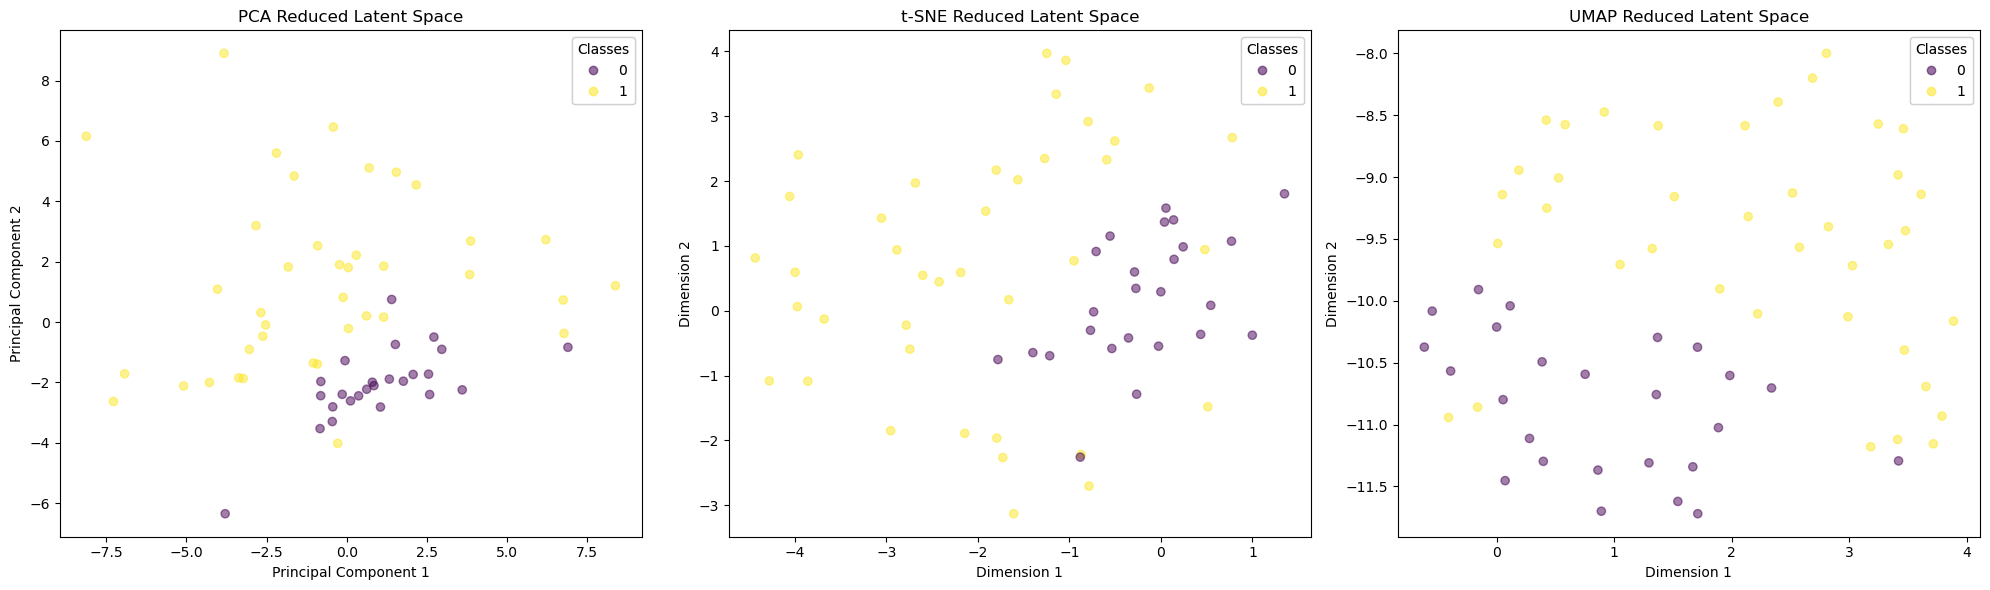

In [61]:


best_latents, best_labels = best_latents_mRNA, best_labels_mRNA
#best_latents, best_labels = best_latents_miRNA, best_labels_miRNA

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
unique_labels = np.unique(best_labels)

# PCA
pca = PCA(n_components=2)
best_pca = pca.fit_transform(best_latents)
scatter = axs[0].scatter(best_pca[:, 0], best_pca[:, 1], c=best_labels, alpha=0.5, cmap='viridis')
legend1 = axs[0].legend(*scatter.legend_elements(), title="Classes")
axs[0].add_artist(legend1)
axs[0].set_title('PCA Reduced Latent Space')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')

# t-SNE
tsne = TSNE(n_components=2)
best_tsne = tsne.fit_transform(best_latents)
scatter = axs[1].scatter(best_tsne[:, 0], best_tsne[:, 1], c=best_labels, alpha=0.5, cmap='viridis')
legend2 = axs[1].legend(*scatter.legend_elements(), title="Classes")
axs[1].add_artist(legend2)
axs[1].set_title('t-SNE Reduced Latent Space')
axs[1].set_xlabel('Dimension 1')
axs[1].set_ylabel('Dimension 2')

# UMAP
reducer = umap.UMAP()
best_umap = reducer.fit_transform(best_latents)
scatter = axs[2].scatter(best_umap[:, 0], best_umap[:, 1], c=best_labels, alpha=0.5, cmap='viridis')
legend3 = axs[2].legend(*scatter.legend_elements(), title="Classes")
axs[2].add_artist(legend3)
axs[2].set_title('UMAP Reduced Latent Space')
axs[2].set_xlabel('Dimension 1')
axs[2].set_ylabel('Dimension 2')

plt.tight_layout()

### VAE examination

#### Lasso regression

In [71]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Assuming you have a target variable for Lasso regression in `best_labels`
lasso = Lasso(alpha=0.1)
lasso.fit(best_latents, best_labels)
lasso_predictions = lasso.predict(best_latents)

# Evaluate the Lasso model
lasso_mse = mean_squared_error(best_labels, lasso_predictions)
print(f"Lasso MSE: {lasso_mse}")

# Assuming you have the original miRNA data in a DataFrame or numpy array called df_miRNA

latent_miRNA_tensor = torch.tensor(best_latents_miRNA).float().to(device)
with torch.no_grad():
    reconstructed_miRNA = best_model_miRNA.decoder(latent_miRNA_tensor).cpu().numpy()

latent_mRNA_tensor = torch.tensor(best_latents_mRNA).float().to(device)
with torch.no_grad():
    reconstructed_mRNA = best_model_mRNA.decoder(latent_mRNA_tensor).cpu().numpy()

# Calculate MSE between original and reconstructed data

vae_mse_mRNA = mean_squared_error(mRNA, reconstructed_mRNA)
print(f"VAE Reconstruction MSE for mRNA: {vae_mse_mRNA}")

vae_mse_miRNA = mean_squared_error(miRNA, reconstructed_miRNA)
print(f"VAE Reconstruction MSE for miRNA: {vae_mse_miRNA}")

Lasso MSE: 0.1128477081656456
VAE Reconstruction MSE for mRNA: 0.2789142288125974
VAE Reconstruction MSE for miRNA: 0.3074532635226817


#### VAE evaluatation

#### SVM classion (compare with PCA and umap)

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_evaluate_svm(latents, labels, test_size=0.2, random_state=42):
    # Splitting the latent vectors and labels into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        latents, labels, test_size=test_size, random_state=random_state)

    # Initialize the SVM classifier
    clf = SVC()

    # Train the SVM classifier using training latent space and labels
    clf.fit(X_train, y_train)

    # Predict on the validation data
    val_predictions = clf.predict(X_val)

    # Calculate the performance metrics
    accuracy = accuracy_score(y_val, val_predictions)
    precision = precision_score(y_val, val_predictions)
    recall = recall_score(y_val, val_predictions)
    f1 = f1_score(y_val, val_predictions)

    # Return the metrics
    return accuracy, precision, recall, f1

# For miRNA
accuracy_miRNA, precision_miRNA, recall_miRNA, f1_miRNA = train_evaluate_svm(best_latents_miRNA, best_labels_miRNA)
print(f"miRNA - Accuracy: {accuracy_miRNA:.4f} \n Precision: {precision_miRNA:.4f} \n Recall: {recall_miRNA:.4f} \n F1 Score: {f1_miRNA:.4f} \n")

# For mRNA
accuracy_mRNA, precision_mRNA, recall_mRNA, f1_mRNA = train_evaluate_svm(best_latents_mRNA, best_labels_mRNA)
print(f"mRNA - Accuracy: {accuracy_mRNA:.4f} \n Precision: {precision_mRNA:.4f} \n Recall: {recall_mRNA:.4f} \n F1 Score: {f1_mRNA:.4f}")


miRNA - Accuracy: 0.7692 
 Precision: 0.7500 
 Recall: 0.8571 
 F1 Score: 0.8000 

mRNA - Accuracy: 0.8462 
 Precision: 0.8571 
 Recall: 0.8571 
 F1 Score: 0.8571


c:\Users\Yichen\.conda\envs\dsan6600\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Yichen\.conda\envs\dsan6600\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
from sklearn.decomposition import PCA
import umap

def apply_pca(data, n_components):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(data)

pca_miRNA = apply_pca(miRNA, n_components=12)  # Assuming 12 components
pca_mRNA = apply_pca(mRNA, n_components=12)

def apply_umap(data, n_components):
    umap_reducer = umap.UMAP(n_components=n_components)
    return umap_reducer.fit_transform(data)

umap_miRNA = apply_umap(miRNA, n_components=12)
umap_mRNA = apply_umap(mRNA, n_components=12)


# Example for PCA-reduced miRNA data
accuracy_pca_miRNA, precision_pca_miRNA, recall_pca_miRNA, f1_pca_miRNA = train_evaluate_svm(pca_miRNA, patient_labels)
accuracy_umap_miRNA, precision_umap_miRNA, recall_umap_miRNA, f1_umap_miRNA = train_evaluate_svm(umap_miRNA, patient_labels)

results_miRNA = {
    "Method": ["PCA", "UMAP", "VAE"],
    "Accuracy": [accuracy_pca_miRNA, accuracy_umap_miRNA, accuracy_miRNA],
    "Precision": [precision_pca_miRNA, precision_umap_miRNA, precision_miRNA],
    "Recall": [recall_pca_miRNA, recall_umap_miRNA, recall_miRNA],
    "F1 Score": [f1_pca_miRNA, f1_umap_miRNA, f1_miRNA]
}

df_results_miRNA = pd.DataFrame(results_miRNA)
print("Comparison of Dimensionality Reduction Methods for miRNA:")
print(df_results_miRNA)

Comparison of Dimensionality Reduction Methods for miRNA:
  Method  Accuracy  Precision    Recall  F1 Score
0    PCA  0.923077   0.875000  1.000000  0.933333
1   UMAP  0.538462   0.538462  1.000000  0.700000
2    VAE  0.769231   0.750000  0.857143  0.800000


c:\Users\Yichen\.conda\envs\dsan6600\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Yichen\.conda\envs\dsan6600\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
accuracy_pca_mRNA, precision_pca_mRNA, recall_pca_mRNA, f1_pca_mRNA = train_evaluate_svm(pca_mRNA, patient_labels)
accuracy_umap_mRNA, precision_umap_mRNA, recall_umap_mRNA, f1_umap_mRNA = train_evaluate_svm(umap_mRNA, patient_labels)

# Creating a DataFrame for mRNA results
results_mRNA = {
    "Method": ["PCA", "UMAP", "VAE"],
    "Accuracy": [accuracy_pca_mRNA, accuracy_umap_mRNA, accuracy_mRNA],
    "Precision": [precision_pca_mRNA, precision_umap_mRNA, precision_mRNA],
    "Recall": [recall_pca_mRNA, recall_umap_mRNA, recall_mRNA],
    "F1 Score": [f1_pca_mRNA, f1_umap_mRNA, f1_mRNA]
}

df_results_mRNA = pd.DataFrame(results_mRNA)
print("Comparison of Dimensionality Reduction Methods for mRNA:")
print(df_results_mRNA)

Comparison of Dimensionality Reduction Methods for mRNA:
  Method  Accuracy  Precision    Recall  F1 Score
0    PCA  0.769231   0.750000  0.857143  0.800000
1   UMAP  0.538462   0.538462  1.000000  0.700000
2    VAE  0.846154   0.857143  0.857143  0.857143


c:\Users\Yichen\.conda\envs\dsan6600\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Yichen\.conda\envs\dsan6600\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


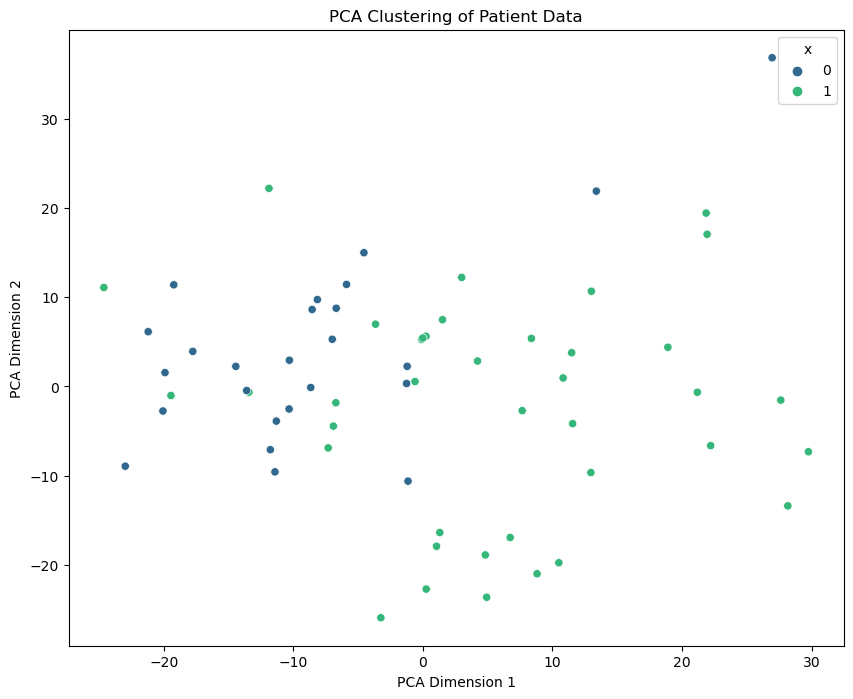

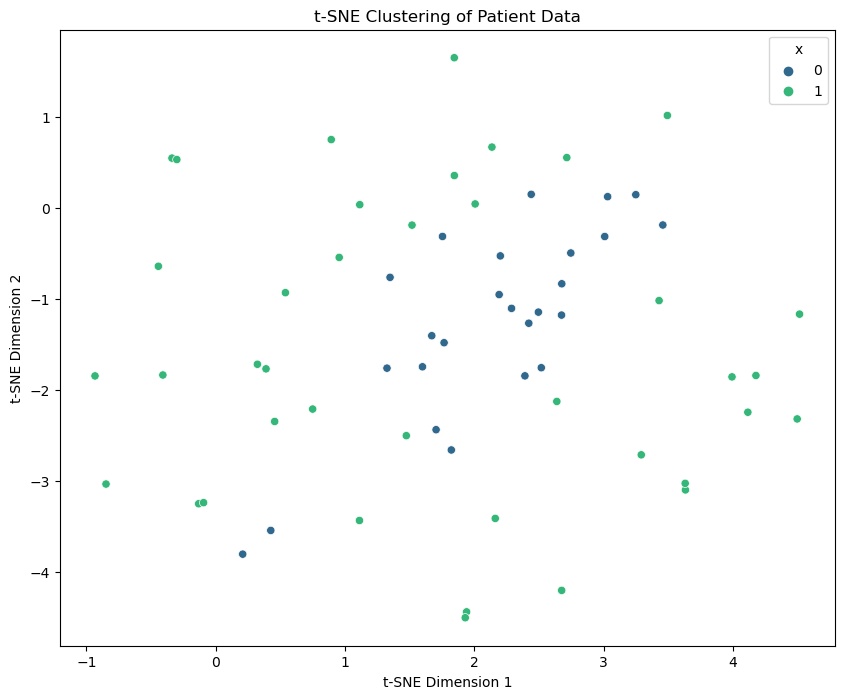

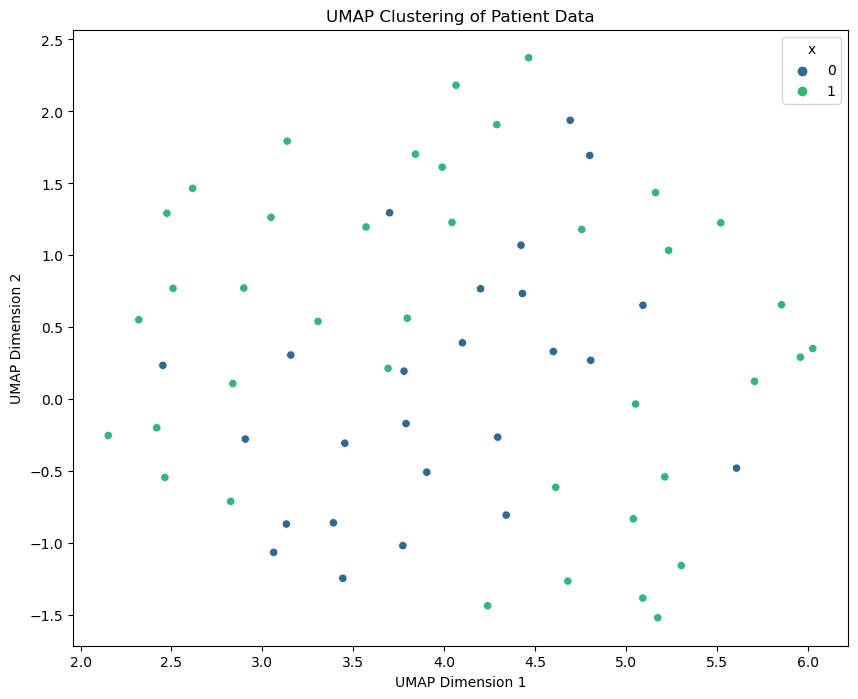

In [84]:
# Assuming you have the following imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

patient_labels = patient_labels.squeeze()

# Apply PCA
pca_2d = PCA(n_components=2)
pca_result = pca_2d.fit_transform(miRNA)  # Replace miRNA with mRNA for mRNA data

# Apply t-SNE
def apply_tsne(data, n_components):
    tsne = TSNE(n_components=n_components, random_state=42)
    return tsne.fit_transform(data)
tsne_result = apply_tsne(miRNA, n_components=2)  # Replace miRNA with mRNA for mRNA data

# Apply UMAP
umap_result = apply_umap(miRNA, n_components=2)  # Replace miRNA with mRNA for mRNA data

def plot_clustering(data, labels, method_name):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='viridis', legend='full')
    plt.title(f'{method_name} Clustering of Patient Data')
    plt.xlabel(f'{method_name} Dimension 1')
    plt.ylabel(f'{method_name} Dimension 2')
    plt.show()

# Visualize PCA
plot_clustering(pca_result, patient_labels, 'PCA')

# Visualize t-SNE
plot_clustering(tsne_result, patient_labels, 't-SNE')

# Visualize UMAP
plot_clustering(umap_result, patient_labels, 'UMAP')


## joint Feature space 

- Create a combined dataset where each entry is a concatenation of the VAE latent representation of a specific mRNA and miRNA.
- Introduce interaction terms. For every pair (latent_mRNA_i, latent_miRNA_j), introduce a new feature that is their product. This serves as an interaction term capturing combined effects of that specific mRNA and miRNA latent feature.

#### Problem: 
- How to incorprate the score_mat (domain knowledege) in to the feature enigneering of the interaction terms? 
- How to **mappinng the latent variable with the original miRNA ands mRNAs**? After BNN select important interaction terms from the joint_dataset, how to convert these back to the original miRNAs and mRNAs.

#### Solution:  

For 1st question:
 
- direct mapping: Assumption here is that the i-th latent feature in the mRNA latent space broadly corresponds to the i-th mRNA, and similarly for miRNA. However, this assumption is a significant simplification because the latent features in a VAE don't usually correspond directly to specific original features. They represent more abstract, compressed aspects of the data.
- mapping through Decoder: first generate the reconstructed mRNA and miRNA data from the latent variables. Then apply the score matrix to the reconstructed data to weight the interactions. 

In [49]:
## direct mapping

import numpy as np

def create_joint_dataset(latents_mRNA, latents_miRNA, score_matrix):
    # Ensure the latent spaces are numpy arrays
    latents_mRNA = np.array(latents_mRNA)
    latents_miRNA = np.array(latents_miRNA)

    # Check dimensions
    if latents_mRNA.shape[1] != latents_miRNA.shape[1]:
        raise ValueError("The dimensions of the two latent spaces must be equal.")

    # Calculate the average scores for each mRNA and miRNA
    avg_scores_mRNA = np.mean(score_matrix, axis=1)  # Averaging across all miRNAs for each mRNA
    avg_scores_miRNA = np.mean(score_matrix, axis=0)  # Averaging across all mRNAs for each miRNA

    # assume a direct mapping here, which might not be accurate.
    
    num_features = latents_mRNA.shape[1]
    interaction_terms = np.empty((latents_mRNA.shape[0], num_features**2))

    # Compute weighted interaction terms
    for i in range(num_features):
        for j in range(num_features):
            weight = avg_scores_mRNA[i] * avg_scores_miRNA[j]
            interaction_terms[:, i * num_features + j] = weight * (latents_mRNA[:, i] * latents_miRNA[:, j])

    # Combine original latent spaces with interaction terms
    joint_dataset = np.hstack((latents_mRNA, latents_miRNA, interaction_terms))

    return joint_dataset

# Usage example
joint_dataset = create_joint_dataset(best_latents_mRNA, best_latents_miRNA, score_mat)
print("Shape of the joint dataset:", joint_dataset.shape)


Shape of the joint dataset: (64, 168)


To mapping the latent space and the score_mat through decoder, I have come up with this new approach:
1. reconstructed mRNA and mRNA based on best latent space for both
2. incorporate the Score_mat to the reconstructed data as average_weight
3. feed weighted_reconstructed data into the encoder (recompress) and generate new latent vector for both
4. Forming new joint_latent space based on the new_latent vectors that already incorporate Score_mat

Problems: **Interpretability difficulty**, as I'm adding another layer of transformation to the data. 

In [68]:
# Assuming best_model is loaded with the state dict of the trained VAE

latent_miRNA_tensor = torch.tensor(best_latents_miRNA).float().to(device)
with torch.no_grad():
    reconstructed_miRNA = best_model_miRNA.decoder(latent_miRNA_tensor).cpu().numpy()

latent_mRNA_tensor = torch.tensor(best_latents_mRNA).float().to(device)
with torch.no_grad():
    reconstructed_mRNA = best_model_mRNA.decoder(latent_mRNA_tensor).cpu().numpy()

avg_scores_mRNA = np.mean(score_mat, axis=1).values.reshape(1, -1)   # Averaging across all miRNAs for each mRNA
avg_scores_miRNA = np.mean(score_mat, axis=0).values.reshape(1, -1)   # Averaging across all mRNAs for each miRNA

# Ensure the dimensions match for broadcasting
# The reconstructed data is of shape (64, 3287) for mRNA and (64, 2195) for miRNA
weighted_reconstructed_mRNA = reconstructed_mRNA * avg_scores_mRNA
weighted_reconstructed_miRNA = reconstructed_miRNA * avg_scores_miRNA

# Convert weighted reconstructed data to tensors
weighted_reconstructed_mRNA_tensor = torch.tensor(weighted_reconstructed_mRNA).float().to(device)
weighted_reconstructed_miRNA_tensor = torch.tensor(weighted_reconstructed_miRNA).float().to(device)

# Obtain new latent representations
with torch.no_grad():
    new_latents_mRNA, _ = best_model_mRNA.encoder(weighted_reconstructed_mRNA_tensor)
    new_latents_miRNA, _ = best_model_miRNA.encoder(weighted_reconstructed_miRNA_tensor)

# Convert latent tensors to numpy arrays
new_latents_mRNA = new_latents_mRNA.cpu().numpy()
new_latents_miRNA = new_latents_miRNA.cpu().numpy()

# Calculate interaction terms
# Assuming new_latents_mRNA and new_latents_miRNA are both of shape (n_samples, n_features)
n_samples, n_features_mRNA = new_latents_mRNA.shape
_, n_features_miRNA = new_latents_miRNA.shape

interaction_terms = np.empty((n_samples, n_features_mRNA * n_features_miRNA))

for i in range(n_features_mRNA):
    for j in range(n_features_miRNA):
        interaction_terms[:, i * n_features_miRNA + j] = new_latents_mRNA[:, i] * new_latents_miRNA[:, j]

# Form the new joint latent space with interaction terms
new_joint_latent_space = np.hstack((new_latents_mRNA, new_latents_miRNA, interaction_terms))

print("Shape of the new joint latent space:", new_joint_latent_space.shape)

Shape of the new joint latent space: (64, 168)


### For training with label added (before functionlized)

Trying to use labels for visualization and evaluation of the latent space representations after training (post hoc), then it doesn't modify the VAE model itself or add a supervised component to it. 

In [ ]:
## Explaination:
## I have test two different way of loading the dataset in this section due to the discrepency in the labels
## In my current idea of combine the latents spaces (miRNA_latent and mRNA_latent) I was thinking of averaging the rows (which is the trained/val latents vector and labels 
## is appened from the VAE for each sample in the batch)

## Problem 1: My original batch size was set as 16 however due to early stopping in the model, there could be incomplete batch that causing the problems when trying to reshape 
## the latent space in to my desire joint feature space (64* (12+12+12*12)), that why in this segement the batch size is adjusted to 64

## Problem 2: If I choose to average and reshape the latents space vector into my desire shape, how to extract the corresponding latent labels? the labels should be the same across
## the batches (for miRNA and mRNA) but somehow it wasn't 
## Could be due to the random splitiing, the 1st batch of labels for mRNA and miRNA is different (as tested at the end) while it shoudn't be the case as the labels for each batch across
## miRNA and mRNA should be the same, thus introducing split by indice to make sure the mRNA and miRNA has the same split between train and val to make the extraction of label 
## make sense

torch.manual_seed(0)

# Convert data and labels into PyTorch tensors
tensor_train = torch.tensor(df_train.values, dtype=torch.float32)
tensor_labels = torch.tensor(patient_labels.values, dtype=torch.float32) 

# Wrap tensors into a TensorDataset
train_dataset = TensorDataset(tensor_train, tensor_labels)
train_size = int(0.8 * len(train_dataset))

# Generate indices for training and validation sets
indices = torch.randperm(len(train_dataset)).tolist()
train_indices = indices[:train_size]
val_indices = indices[train_size:]

# Create samplers using the generated indices
train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

# DataLoader using the samplers
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler)
val_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=val_sampler)

best_val_loss = float('inf')
patience = 500  # Number of epochs to wait for improvement before stopping
wait = 0

In [14]:
## The original way of data loading and spliting

# Prepare and split the data
tensor_labels = torch.tensor(patient_labels.values, dtype=torch.float32)
tensor_train = torch.tensor(df_train.values, dtype=torch.float32)
train_dataset = TensorDataset(tensor_train, tensor_labels)
full_dataset = TensorDataset(tensor_train, tensor_labels)

full_dataset_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=False)

train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [30]:
# Model compile

model = VAE(input_dim, hidden_dim1, hidden_dim2, z_dim, drop_out=drop)
model = model.to('cuda') 

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

best_val_loss = float('inf')
val_loss_values = []
train_loss_values = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for data, _ in train_loader:
        data = data.to('cuda')
        optimizer.zero_grad()
        recon_batch, mu, log_var = model(data)
        loss = loss_function(recon_batch, data, mu, log_var)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(train_loader.dataset)
    train_loss_values.append(train_loss)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for data, _ in val_loader:
            data = data.to('cuda')
            recon_batch, mu, log_var = model(data)
            val_loss += loss_function(recon_batch, data, mu, log_var).item()

    val_loss /= len(val_loader.dataset)
    val_loss_values.append(val_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    # Check for improvement
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pth')
        wait = 0  # Reset wait counter
    else:
        wait += 1
        if wait >= patience:
            print('Early stopping')
            break


Epoch 1/10000, Train Loss: 4039.3137, Validation Loss: 2819.1253
Epoch 2/10000, Train Loss: 3857.7414, Validation Loss: 2816.2224
Epoch 3/10000, Train Loss: 3745.7616, Validation Loss: 2777.8041
Epoch 4/10000, Train Loss: 3594.3998, Validation Loss: 2714.1674
Epoch 5/10000, Train Loss: 3469.7736, Validation Loss: 2605.1031
Epoch 6/10000, Train Loss: 3242.0987, Validation Loss: 2622.3723
Epoch 7/10000, Train Loss: 3035.6017, Validation Loss: 2982.7834
Epoch 8/10000, Train Loss: 2857.4170, Validation Loss: 3592.1406
Epoch 9/10000, Train Loss: 2687.7767, Validation Loss: 4529.8434
Epoch 10/10000, Train Loss: 2571.0064, Validation Loss: 5422.6244
Epoch 11/10000, Train Loss: 2483.9012, Validation Loss: 6049.1448
Epoch 12/10000, Train Loss: 2424.6544, Validation Loss: 6661.6148
Epoch 13/10000, Train Loss: 2397.0228, Validation Loss: 6229.1833
Epoch 14/10000, Train Loss: 2358.9400, Validation Loss: 5754.8371
Epoch 15/10000, Train Loss: 2311.8159, Validation Loss: 5126.8474
Epoch 16/10000, Tra

In [31]:
# Load the best model
best_model = VAE(input_dim, hidden_dim1, hidden_dim2, z_dim, drop_out=drop)
best_model.load_state_dict(torch.load('best_model.pth'))
best_model = best_model.to('cuda')
best_model.eval()

# Initialize lists to store the latent vectors and labels
best_latents = []
best_labels = []

tensor_labels = torch.tensor(patient_labels.values, dtype=torch.float32)
tensor_train = torch.tensor(df_train.values, dtype=torch.float32)
full_dataset = TensorDataset(tensor_train, tensor_labels)

full_dataset_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=False)

# Extract the latent vectors and labels from the entire dataset
with torch.no_grad():
    for batch in full_dataset_loader:
        data, labels = batch
        data = data.to('cuda')
        mu, _ = best_model.encoder(data)
        best_latents.extend(mu.cpu().detach().numpy())
        best_labels.extend(labels.numpy())  # Assuming labels are already on CPU
        
            
# Convert lists to numpy arrays for easier handling
best_latents = np.array(best_latents)
best_labels = np.array(best_labels)

print("The shape of best_latent array is", best_latents.shape)
print("The shape of best_label array is", best_labels.shape)

The shape of best_latent array is (64, 12)
The shape of best_label array is (64, 1)


###  Reconstruction Error Contribution

Train a linear model (like a linear regression) to predict the reconstruction error of each sample based on its feature values. Features that have higher coefficients in this model can be interpreted as having a greater influence on the reconstruction error.

In the training loop, for each batch, we store the average sample in train_data_avg_batch, and the reconstruction error for that average sample in train_sample_recon_errors. Each entry in train_sample_recon_errors corresponds to the reconstruction error for the average sample of each batch. We can then use train_data_avg_batch as our feature matrix and train_sample_recon_errors as our target variable to train a linear regression model. By examining the coefficients of the linear model, we can infer the importance of each feature in terms of its contribution to the reconstruction error.


In [14]:
from sklearn.linear_model import LinearRegression

# Using the original data (tensor_train) and train_recon_errors to train the linear model
reg = LinearRegression().fit(train_data_avg_batch, train_sample_recon_errors)

# Get the coefficients
coefficients = reg.coef_

# Rank features by importance
ranked_features_by_error_contribution = np.argsort(np.abs(coefficients))[::-1]

# Display top N influential features
N = 12
top_N_features = ranked_features_by_error_contribution[:N]
print("Top N features based on their influence on reconstruction error:", top_N_features)
linselected_mRNA_names = [df_train.columns.tolist()[i] for i in top_N_features]
print(linselected_mRNA_names)


Top N features based on their influence on reconstruction error: [  1  11  15   5   6   2   4 330   9   0 467 329]
['A4GALT', 'ABAT', 'ABCB4', 'AADAC', 'AADAT', 'A4GNT', 'AACS', 'ATP4B', 'AASDHPPT', 'A2M', 'CACNG3', 'ATP4A']


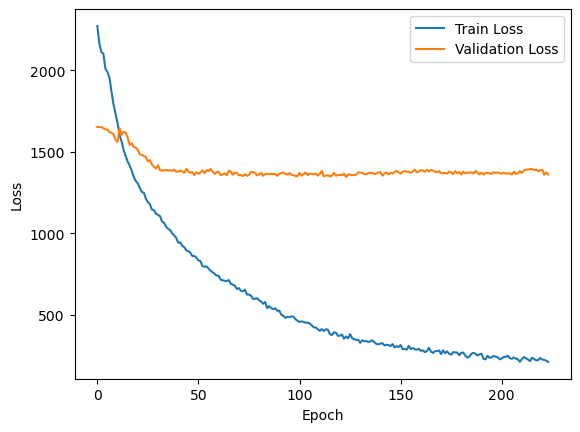

In [54]:
plt.plot(miRNA_train_loss, label='Train Loss')
plt.plot(miRNA_val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()